In [ ]:
#importing the libraries
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape:(50000, 32, 32, 3)
y_train shape:(50000, 1)
x_test shape:(10000, 32, 32, 3)
y_test shape:(10000, 1)


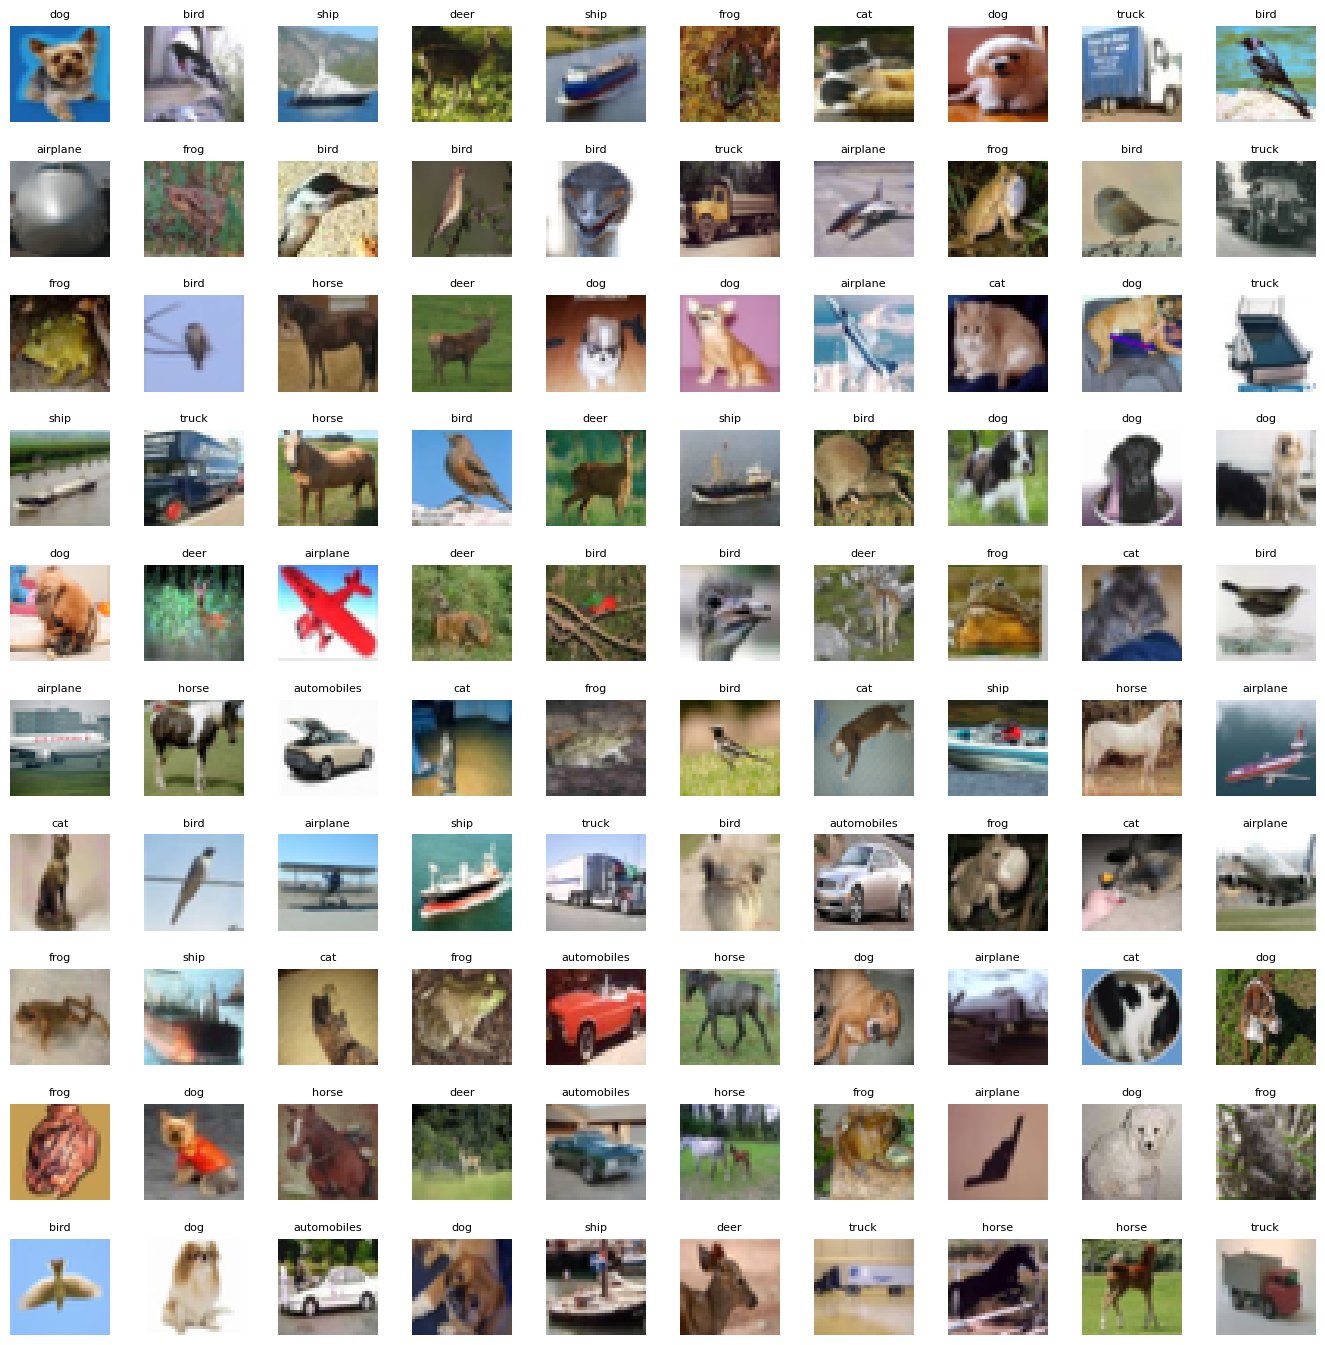

In [ ]:
#Define the labels of the dataset
labels=["airplane","automobiles","bird","cat","deer",
        "dog","frog","horse","ship","truck"]
fig,axes = plt.subplots(10,10,figsize=(17,17))
axes = axes.ravel()
n_train = len(x_train)

for i in np.arange(0,100):
  index=np.random.randint(0,n_train)
  axes[i].imshow(x_train[index,1:])
  label_index=int(y_train[index])
  axes[i].set_title(labels[label_index],fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

label: truck


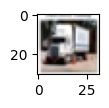

In [ ]:
print('label:',labels[int(y_train[666])])
plt.figure(figsize=(0.8,1))
plt.imshow(x_train[666,1:])
plt.show()

Text(0.5, 1.0, 'class distribution in the training set')

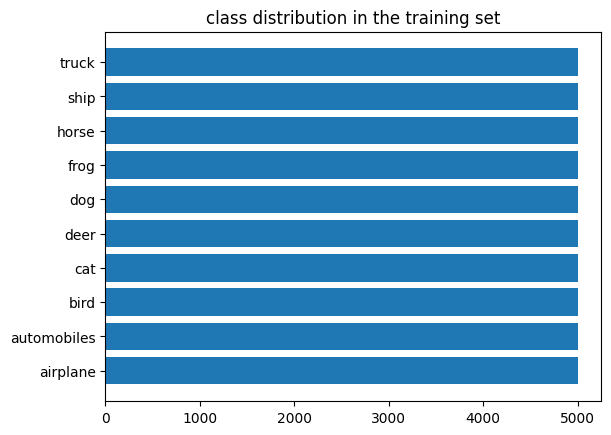

In [ ]:
classes,counts=np.unique(y_train,return_counts=True)
plt.barh(labels,counts)
plt.title("class distribution in the training set")

In [ ]:
#normalize the values 0 to 1 range
x_train=x_train.astype('float')
x_test=x_test.astype('float')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
num_classes=10

In [ ]:
#model creation
model=Sequential()
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                100384    
                                                        

In [ ]:
#model compilation
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
500/500 [==============================] - 80s 158ms/step - loss: 2.0660 - accuracy: 0.2085 - val_loss: 1.7583 - val_accuracy: 0.3882
Epoch 2/50
500/500 [==============================] - 59s 118ms/step - loss: 1.8289 - accuracy: 0.2918 - val_loss: 1.5781 - val_accuracy: 0.4433
Epoch 3/50
500/500 [==============================] - 61s 122ms/step - loss: 1.7417 - accuracy: 0.3281 - val_loss: 1.5185 - val_accuracy: 0.4748
Epoch 4/50
500/500 [==============================] - 54s 108ms/step - loss: 1.7046 - accuracy: 0.3415 - val_loss: 1.4727 - val_accuracy: 0.4897
Epoch 5/50
500/500 [==============================] - 51s 101ms/step - loss: 1.6724 - accuracy: 0.3509 - val_loss: 1.4311 - val_accuracy: 0.4986
Epoch 6/50
500/500 [==============================] - 52s 104ms/step - loss: 1.6405 - accuracy: 0.3681 - val_loss: 1.3787 - val_accuracy: 0.5176
Epoch 7/50
500/500 [==============================] - 51s 102ms/step - loss: 1.6088 - accuracy: 0.3782 - val_loss: 1.3579 - val_ac

In [ ]:
#model evaluation
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss: ',score[0])
print('Test Accuracy: ', score[1])

Test Loss:  1.1074482202529907
Test Accuracy:  0.6233000159263611


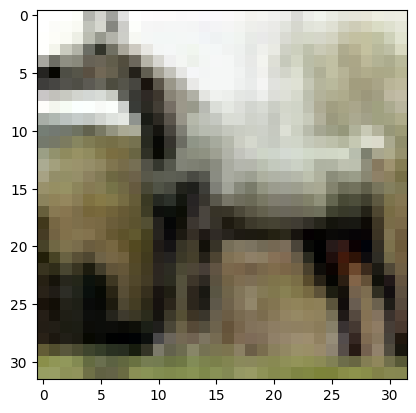

In [ ]:
plt.imshow(x_test[856])

In [ ]:
prediction = model.predict(x_test[856].reshape(1,32,32,3))
print('Prediction score: \n', prediction[0])
thresholded = (prediction>0.5)*1
print('\n Thresholded score: \n',thresholded[0])
im_index = np.where(thresholded==1)[1][0]
print('Predicted image: \n', labels[im_index])

1/1 [==============================] - 0s 224ms/step
Prediction score: 
 [3.3124688e-03 4.0965777e-05 1.1862634e-02 1.9729862e-03 5.7781313e-02
 8.0977604e-03 8.1812912e-05 9.1615725e-01 2.2996783e-06 6.9044100e-04]

 Thresholded score: 
 [0 0 0 0 0 0 0 1 0 0]
Predicted image: 
 horse
